### Run on Colab

Colab [Link](https://colab.research.google.com/drive/1yWSKl7i-LR0NuHuOiLnXHkpqmP0doadO?usp=sharing)

#Load SteganoGAN Repository


In [ ]:
! pip install reedsolo

     |████████████████████████████████| 271 kB 4.3 MB/s 
  Created wheel for reedsolo: filename=reedsolo-1.5.4-cp37-cp37m-linux_x86_64.whl size=706442 sha256=456dd55a3537546943855c0b72b0118026ad0cd6545cea2b0183c24067810f24
  Stored in directory: /root/.cache/pip/wheels/20/b9/92/6b9dcd4ed356565c382d97443dfb6206f614c032149402a49d
Successfully built reedsolo


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [ ]:
! git clone https://github.com/DAI-Lab/SteganoGAN.git

Cloning into 'SteganoGAN'...
remote: Enumerating objects: 1964, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 1964 (delta 5), reused 9 (delta 2), pack-reused 1943
Receiving objects: 100% (1964/1964), 43.51 MiB | 11.74 MiB/s, done.
Resolving deltas: 100% (1015/1015), done.


In [ ]:
##Appenging the stegnogan library to the system paths
import sys
sys.path.append("/content/SteganoGAN")

#Loading Modules

In [ ]:
##Load SteganoGAN Modules
from steganogan import SteganoGAN
from steganogan.encoders import BasicEncoder, DenseEncoder
from steganogan.decoders import BasicDecoder, DenseDecoder
from steganogan.critics import BasicCritic
from steganogan.loader import DataLoader

#Loading Dataset

**Downloading The Data**

In [ ]:
#!bash "/content/Improved_StegnoGan/research/data/download.sh"

**Moving The Data**

In [ ]:
# shutil.move("/content/div2k", "/content/drive/MyDrive/Data")

Since the data is only downloaded and moved once, then these two lines are commented. We don't need to run them again

**Load The Data**

In [ ]:
# Load the data
train = DataLoader('/content/drive/MyDrive/Data/div2k/train', limit=np.inf, shuffle=True, batch_size=4)
validation = DataLoader('/content/drive/MyDrive/Data/div2k/val', limit=np.inf, shuffle=True, batch_size=4)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


**Checking the size of of the data**

In [ ]:
import os
print("Size of div2k dataset:")
print("Train set: ",len(os.listdir("/content/drive/MyDrive/Data/div2k/train/_")))
print("Validation set: ",len(os.listdir("/content/drive/MyDrive/Data/div2k/val/_")))

Size of div2k dataset:
Train set:  800
Validation set:  100


#Train Model

Here We can specify the depth parameter and decide the type of model to use

We applied all the different parameters with 10 epochs 
- Depth = [1,2,3,4,5,6]
- Models = ['Dense', 'Basic', 'Residual']

In [ ]:
# Create the SteganoGAN instance
steganogan = SteganoGAN(1, BasicEncoder, BasicDecoder, BasicCritic, hidden_size=32, cuda=True, verbose=True)

Using CUDA device


In [ ]:
# Fit on the given data
steganogan.fit(train, validation, epochs=10)

Epoch 1/10


  0%|          | 0/200 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 25/25 [00:19<00:00,  1.30it/s]


Epoch 2/10


100%|██████████| 25/25 [00:14<00:00,  1.73it/s]


Epoch 3/10


100%|██████████| 25/25 [00:14<00:00,  1.76it/s]


Epoch 4/10


100%|██████████| 25/25 [00:14<00:00,  1.76it/s]


Epoch 5/10


100%|██████████| 25/25 [00:13<00:00,  1.83it/s]


Epoch 6/10


100%|██████████| 25/25 [00:13<00:00,  1.83it/s]


Epoch 7/10


100%|██████████| 25/25 [00:14<00:00,  1.78it/s]


Epoch 8/10


100%|██████████| 25/25 [00:14<00:00,  1.76it/s]


Epoch 9/10


100%|██████████| 25/25 [00:13<00:00,  1.80it/s]


Epoch 10/10


100%|██████████| 25/25 [00:13<00:00,  1.86it/s]


In [ ]:
# Save the fitted model
steganogan.save('stegano_basic_1.steg')

#Testing The Model

In [ ]:
steganogan = SteganoGAN.load(path="/content/stegano_basic_1.steg", cuda=True, verbose=True)

Using CUDA device


In [ ]:
steganogan.encode("/content/test1.jpg", "test1_encoded.png", "Message to hide: AI is so much fun")

Encoding completed.


In [ ]:
steganogan.encode("/content/test2.jpg", "test2_encoded.png", "Message to hide: AI is so much fun")

Encoding completed.


**Showing Results**

In [ ]:
##Function to show the cover and the encoded image
def show_difference(path_cover_image,path_encoded_image):
  plt.figure(figsize=(40,35))
  plt.subplot(1,2,1)
  plt.axis("off")
  plt.title("Cover Imgae",fontsize=40)
  img1=imageio.imread(path_cover_image)
  plt.imshow(img1)
  plt.subplot(1,2,2)
  plt.axis("off")
  plt.title("Encoded Imgae",fontsize=40)
  img1=imageio.imread(path_encoded_image)
  plt.imshow(img1)

To test our model, we have chosen two photos. One wih texture and the other without to show the differences. 

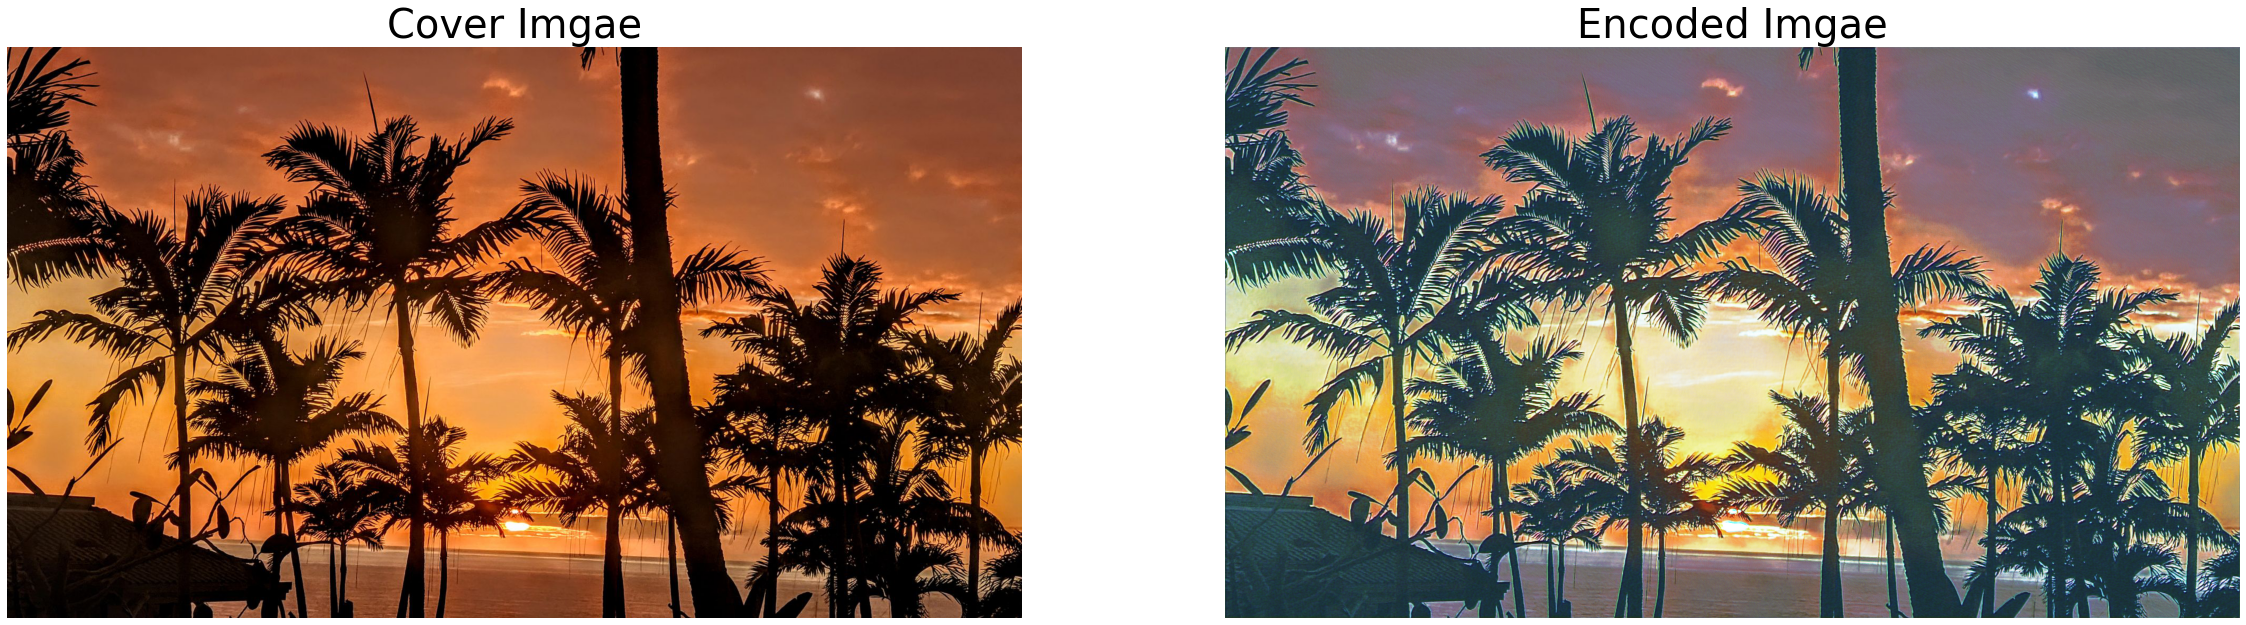

In [ ]:
show_difference("/content/test1.jpg","/content/test1_encoded.png")

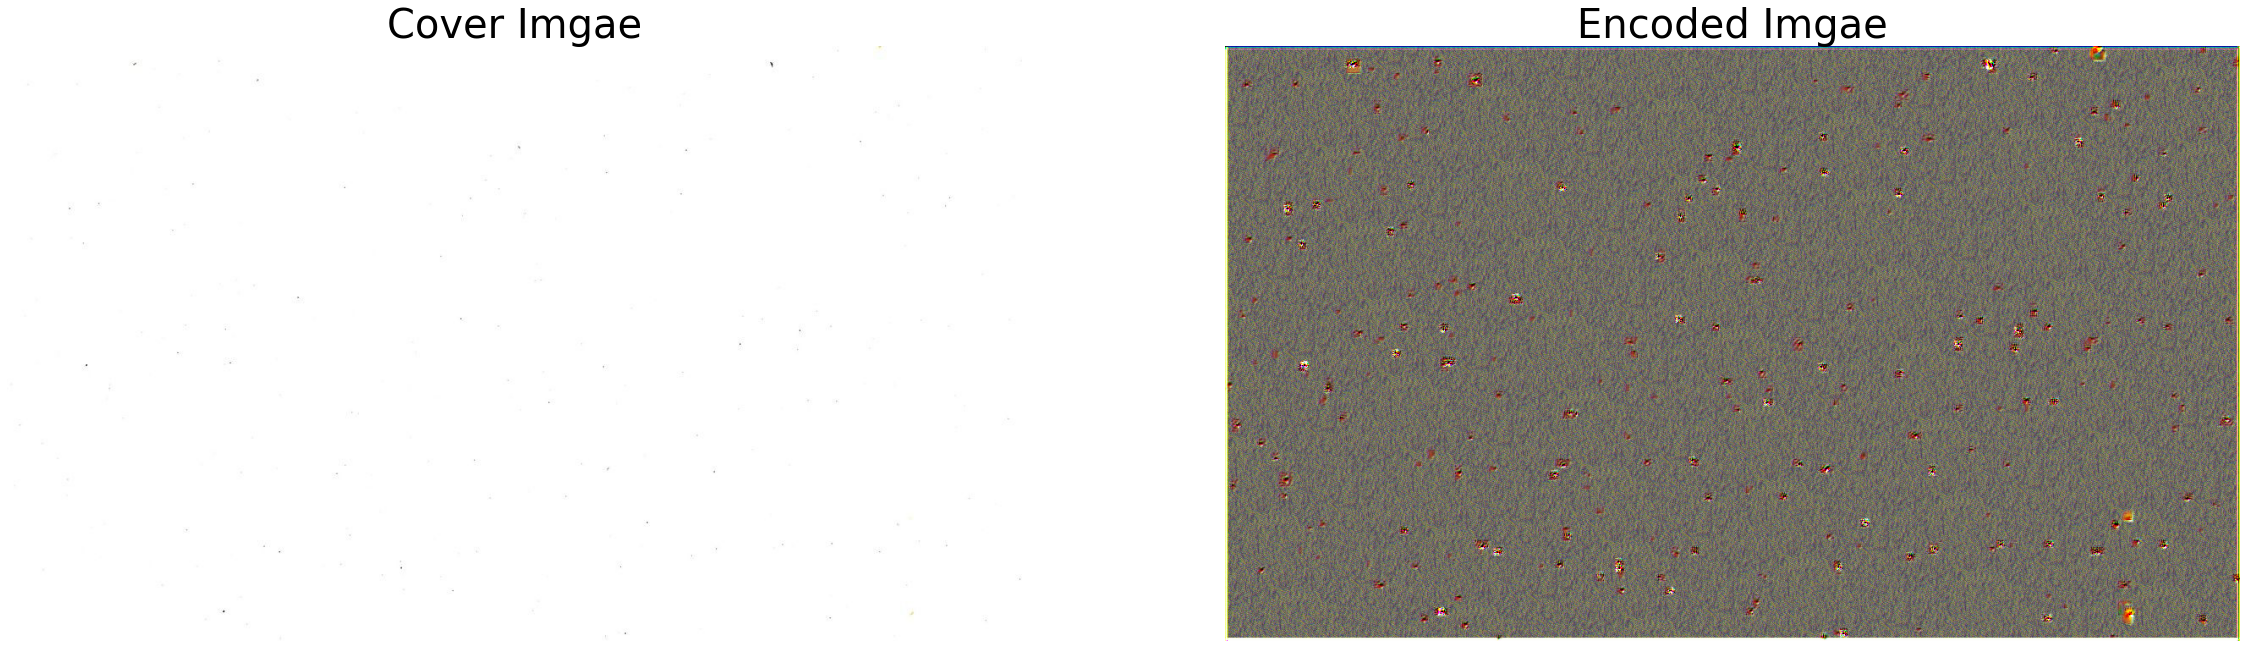

In [ ]:
show_difference("/content/test2.jpg","/content/test2_encoded.png")

We can clearly say that it is hard for the model to incoporate the message in an image with a less texture

**Checking Metrices**

In [ ]:
steganogan.fit_metrics

{'epoch': 10,
 'train.cover_score': 0.01815441021695733,
 'train.decoder_acc': 0.8728852036595345,
 'train.decoder_loss': 0.27853416189551355,
 'train.encoder_mse': 0.037672613386530426,
 'train.generated_score': 0.10762026565149427,
 'val.bpp': 0.7555771493911743,
 'val.cover_score': 0.017677152380347252,
 'val.decoder_acc': 0.8777885746955871,
 'val.decoder_loss': 0.27156800389289854,
 'val.encoder_mse': 0.030877043269574644,
 'val.generated_score': 0.10342859447002412,
 'val.psnr': 21.61625952720642,
 'val.ssim': 0.6182336926460266}